In [1]:
from header import *
plt.rcParams.update({'font.size': 14})

In [2]:
#df = read_benchmarks_aggregation('results/aggregated_benchmarks.csv')
#df[(df.m == 100) & (df.N==10000) ]

In [3]:
def exper2img(caption, df, x, y, xlog, ylog, **kwargs):
    #print('Draw {} vs {}, ylog={}, kwargs={}'.format(x, y, ylog, kwargs))
           
    df = df.sort_values(['algo', x, 'm'], ascending=[True, True, True])
    
    fig, ax = plt.subplots()
    
    # data
    lines = []
    for algo in df.sort_values('algo').algo.unique():
        for readlen in df.m.unique():
            d = df[(df.algo == algo) & (df.m == readlen)]
            msize=6
            lwidth=2
            #msize = 6.5 if algo == 'astarix' else 6 if algo == 'dijkstra' else 5
            #lwidth = 2 if algo == 'astarix' else 1.5 if algo == 'dijkstra' else 1
            #scatter = ax.scatter(d[x], d[y], c=d['c'], s=d['m']**2/100, label=algo, alpha=0.5, edgecolors='none')
            line, = ax.plot(d[x], d[y], readlen2style(readlen), linestyle='-', c=algo2color(algo),
                            label=algo, alpha=0.7, linewidth=lwidth, markersize=msize)
            lines.append(line)
            #weight = 'bold' if algo == 'astarix' else 'normal'
            #ax.text(d[x].median(), d[y].median(), algo2beautiful(algo), {'color': algo2color(algo), 'fontsize': 15, 'weight': weight}, ha="right", va="top")
            
            logx, logy = list(np.log(d[x])), list(np.log(d[y]))
            p = (logy[-2]-logy[0]) / (logx[-2]-logx[0])
            #a, b = np.polyfit(np.log(d[y]), np.log(d[x]), 1)
            #b = abs(b)
            print(caption,algo,p)
  
    if y == 's':
        ax.text(4, 80, "$y \sim x^{0.2}$", ha='center', va='bottom', size=16, alpha=0.7)
        ax.text(2.5, 3000, "$y \sim x$", ha='center', va='bottom', size=16, alpha=0.7)

    # Legend of algorithm
    display([df.sort_values('algo').algo.unique()])
    algo_leg = ax.legend(lines[::len(df.m.unique())], [algo2beautiful(a) for a in df.sort_values('algo').algo.unique()],
                         loc="upper left", prop={'size': 15}, framealpha=0.5)
    
    #for lh in algo_leg.legendHandles: 
    #    lh.set_alpha(alpha)
    ax.add_artist(algo_leg)
    # Legend of readlengths
    #handles, labels = scatters[0].legend_elements(prop="sizes", alpha=0.6)
    #legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

    if xlog: ax.set_xscale('log')
    if ylog: ax.set_yscale('log')   # plt.semilogy(basey=2)
    
    # grid
    #ax.margins(x=0) 
    ax.set_facecolor('#F3F3F3')
    ax.grid(True, which='both', alpha=1, color='w')
    ax.grid(False, axis='x', which='both')
    ax.grid(False, axis='y', which='minor')
    
    # labels
    ax.set_xlabel(col2name(x), size=18)  # weight='bold',
    ax.set_ylabel(col2name(y), rotation=0, ha='center', size=18)
    ax.yaxis.set_label_coords(-0.0,1.00)
    
    # spines
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    
    # ticks
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #left=False,
        #top=False,         # ticks along the top edge are off
        #labelbottom=False,
        labelsize=16,
    ) # labels along the bottom edge are off
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda num, pos: myticks(num, pos)+''+col2unit(x)))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda num, pos: myticks(num, pos)+''+col2unit(y)))
    
    #fig.savefig('{}-{}x{}.pdf'.format(caption.replace(' ', '_'), x, y), bbox_inches='tight')

df['head_Mbp'] = df['head'] / 10**6
exper2img('performance_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head_Mbp', y='s', xlog=True, ylog=True)
exper2img('memory_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head', y='max_rss', xlog=True, ylog=True)

NameError: name 'df' is not defined

,algo,graph,head,N,m,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,head_Mbp
0,astarix-seeds,ecoli,10000,10000,100,15.3445,0:00:15,26.95,39.38,22.89,23.34,2.11,3.27,95.61,0.01
1,astarix-seeds,ecoli,100000,10000,100,24.0369,0:00:24,158.45,279.24,154.36,155.09,4.23,2.03,61.45,0.10
2,astarix-seeds,ecoli,1000000,10000,100,27.3274,0:00:27,167.55,287.24,163.59,164.05,3.07,1.83,54.14,1.00
3,astarix-seeds,ecoli,10000000,10000,100,42.6400,0:00:42,683.20,1363.30,679.20,680.70,4.50,0.68,34.79,10.00
4,astarix-prefix,ecoli,10000,10000,100,15.6844,0:00:15,31.29,43.53,26.52,26.89,0.00,3.22,93.57,0.01
5,astarix-prefix,ecoli,100000,10000,100,22.9006,0:00:22,43.98,58.85,39.95,40.30,2.21,2.18,64.28,0.10
6,astarix-prefix,ecoli,1000000,10000,100,33.7109,0:00:33,154.93,274.75,150.87,151.23,0.00,1.41,43.55,1.00
7,astarix-prefix,ecoli,10000000,10000,100,56.4238,0:00:56,669.80,1042.75,665.54,665.91,6.61,3.07,79.49,10.00


performance_vs_genomesize astarix-prefix 0.16615121884612888
performance_vs_genomesize astarix-seeds 0.12532278611121722


[array(['astarix-prefix', 'astarix-seeds'], dtype=object)]

memory_vs_genomesize astarix-prefix 0.3473649788654189
memory_vs_genomesize astarix-seeds 0.3967928313242665


[array(['astarix-prefix', 'astarix-seeds'], dtype=object)]

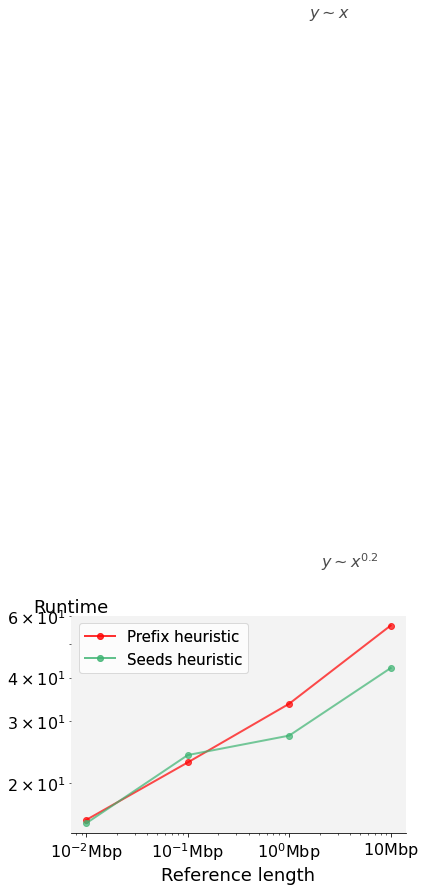

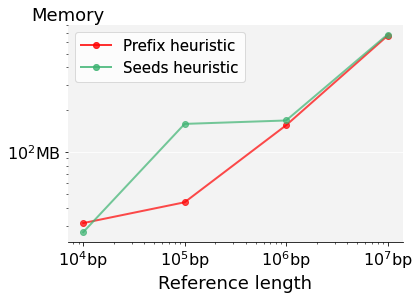

In [4]:
df = read_benchmarks_aggregation('results/REF_SIZE_SCALING_DONE')
display(df)
exper2img('performance_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head_Mbp', y='s', xlog=True, ylog=True)
exper2img('memory_vs_genomesize', df[(df.N == 10000) & (df.graph == 'ecoli') & (df.m == 100)], x='head', y='max_rss', xlog=True, ylog=True)

,algo,graph,head,N,m,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,head_Mbp
0,astarix-seeds,ecoli,1000000000,1000,100,13.4735,0:00:13,695.73,1166.91,693.80,694.11,0.0,0.36,95.39,1000.0
1,astarix-seeds,ecoli,1000000000,10000,100,44.6564,0:00:44,706.45,1171.29,704.64,704.95,0.0,0.41,33.44,1000.0
2,astarix-seeds,ecoli,1000000000,100000,100,291.0111,0:04:51,819.40,1211.64,814.31,815.05,0.0,34.89,97.71,1000.0
3,astarix-seeds,ecoli,1000000000,1000000,100,3483.4761,0:58:03,2526.96,2905.44,2521.95,2522.58,0.0,355.22,99.26,1000.0
4,astarix-prefix,ecoli,1000000000,1000,100,15.6072,0:00:15,678.29,1358.91,676.27,676.59,0.0,0.35,95.48,1000.0
5,astarix-prefix,ecoli,1000000000,10000,100,53.9073,0:00:53,728.89,1363.30,727.95,728.27,0.0,3.09,83.15,1000.0
6,astarix-prefix,ecoli,1000000000,100000,100,444.3419,0:07:24,940.19,1315.88,935.06,935.80,0.0,35.03,97.65,1000.0
7,astarix-prefix,ecoli,1000000000,1000000,100,7200.2461,2:00:00,4523.13,4982.08,4517.97,4518.60,0.0,216.11,99.31,1000.0


performance_vs_genomesize astarix-prefix 0.7271961360066977
performance_vs_genomesize astarix-seeds 0.6672145639216984


[array(['astarix-prefix', 'astarix-seeds'], dtype=object)]

memory_vs_genomesize astarix-prefix 0.07090010666443328
memory_vs_genomesize astarix-seeds 0.03552761450062205


[array(['astarix-prefix', 'astarix-seeds'], dtype=object)]

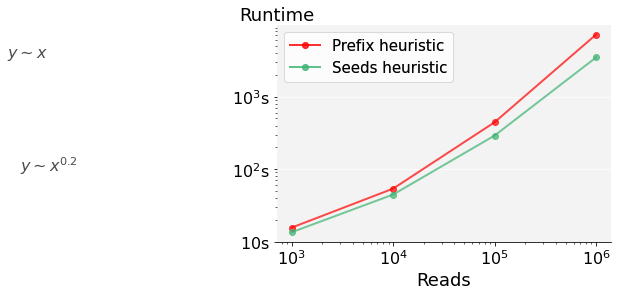

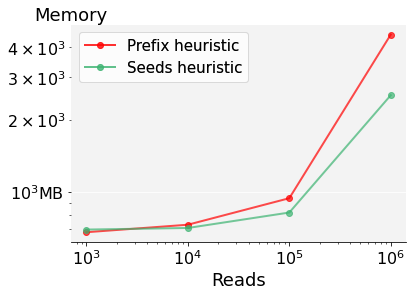

In [9]:
df = read_benchmarks_aggregation('results/NUMREADS_SCALING_DONE')
display(df)
exper2img('performance_vs_genomesize', df[(df.graph == 'ecoli') & (df.m == 100)], x='N', y='s', xlog=True, ylog=True)
exper2img('memory_vs_genomesize', df[(df.graph == 'ecoli') & (df.m == 100)], x='N', y='max_rss', xlog=True, ylog=True)